## Exercise 04 : Histogram

* analyze only the users and not the admins
* create two lists of values (for working days and for weekends) for the histogram
input
* the figsize is still the same, you can choose the fontsize as well as the color palette
* use a level of transparency for the histogram in front equal to 0.7
* at the end of your Jupyter Notebook, create a markdown cell and insert the question:
“Are there hours when the total number of commits was higher on weekends than
on working days?” In your answer, put the top-4 examples.

In [26]:
import pandas as pd 
import sqlite3
import matplotlib.pyplot as plt
con = sqlite3.connect('../data/checking-logs.sqlite')
weekend_query="""
SELECT 
    CAST (strftime('%H', timestamp) AS INTEGER) AS hour,
    strftime('%w', timestamp) AS weekend
FROM checker 
    WHERE uid LIKE "user_%" AND strftime('%w', timestamp)  IN ('0','6') 
"""
df_week=pd.read_sql(weekend_query, con)
df_week['hour']=pd.to_numeric(df_week['hour'])
df_week_list=df_week['hour'].tolist()

In [29]:
working_query="""
SELECT 
    CAST(strftime('%H', timestamp) AS INTEGER) AS hour,
    strftime('%w', timestamp) AS working_day
FROM checker
    WHERE uid LIKE "user_%" AND strftime('%w', timestamp)  IN ('1','2','3', '4', '5')
"""
df_work=pd.read_sql(working_query, con)
df_work['hour']=pd.to_numeric(df_work['hour'])
df_work_list=df_work['hour'].tolist()

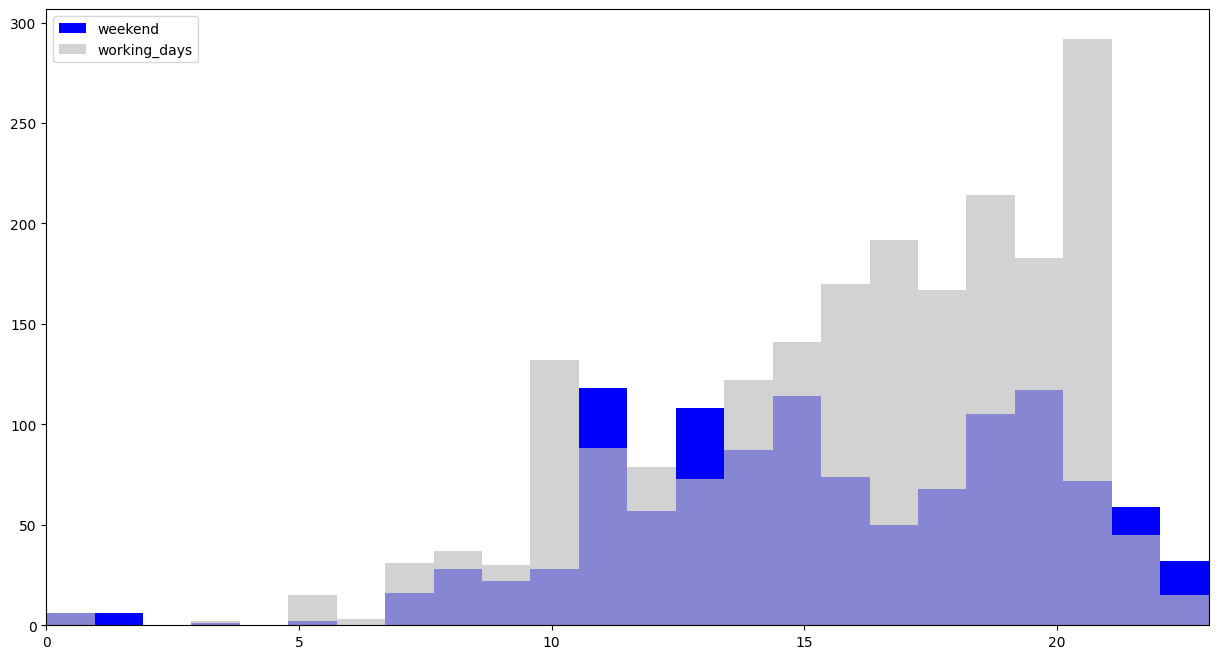

In [33]:
fig, ax=plt.subplots(figsize=(15,8))
ax.hist(
    df_week_list,
    bins=24,
    color='blue',
    label='weekend'
)
ax.hist(
    df_work_list,
    bins=24,
    label='working_days',
    color='silver',
    alpha=0.7
)
ax.set_xlim(0,23)
ax.legend(loc='upper left')

“Are there hours when the total number of commits was higher on weekends than
on working days?” 

11,13,22,23

In [34]:
con.close()